# Data Wrangling and Analysis  of Twitter WeRateDogs
#### by Luyuan Zhang, August 2018

<a id='top'></a>

This is the final project of Udacity Data Wrangling course, which is the third part of term 2 of Data Analyst Nano Degree. This file mainly documents data wrangling effort in gathering, assessing and cleaning twitter WeRateDogs archive data. The final clean data is copied to dataframe df for brief analysis and visualization.

**Table of contents**:
1. [Data gathering](#gathering)<br>
2. [Data assessment](#assessment)<br>
3. [Data cleaning](#cleaning)<br>
4. [Data analysis and visualization](#analysis)<br>
5. [References](#references)

Import libraries

In [3]:
import os
import pandas as pd
import numpy as np
import tweepy
import requests
from PIL import Image
from io import BytesIO
import json
import ast
from bs4 import BeautifulSoup as BS
import matplotlib.pyplot as plt
%matplotlib inline

<a id='gathering'></a>

[back to top of the report](#top)

## 1. Gathering

***table of contents***:<br>
1.1 [archive: from twitter-archive-enhanced.csv](#archive)    <br>
1.2 [updated_info: from Twitter using API](#updated_info)    <br>
1.3 [image_predictions: request from url](#image_predictions)

<a id='archive'></a>

### 1.1 archive: from twitter-archive-enhanced.csv

In [4]:
archive=pd.read_csv('twitter-archive-enhanced.csv')
archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


<a id='updated_info'></a>

### 1.2 updated_info: from Twitter using API
acquire additional tweet data to the archive through twitter API using tweet_id

set up API

In [132]:
import tweepy

consumer_key = 'xxxx'
consumer_secret = 'xxxx'
access_token = 'xxxx'
access_secret = 'xxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

gather and save data into tweet_json.txt

In [133]:
import json
success_ids=[]
error_ids=[]
with open('tweet_json.txt', 'w') as outfile:
    for id in archive['tweet_id']:
        try:
            tweet=api.get_status(id, tweet_mode='extended',
                                wait_on_rate_limit=True,
                                wait_on_rate_limit_notify=True)
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            success_ids.append(id)
            print('Successfully obtained tweets of user {}'.format(id))
        except Exception as e: 
            error={}
            error['error message']=e
            error['tweet_id']=id
            error_ids.append(error) 
error_ids=pd.DataFrame(error_ids)
error_ids.to_csv('error_ids.csv', index=False)

Successfully obtained tweets of user 892420643555336193
Successfully obtained tweets of user 892177421306343426
Successfully obtained tweets of user 891815181378084864
Successfully obtained tweets of user 891689557279858688
Successfully obtained tweets of user 891327558926688256
Successfully obtained tweets of user 891087950875897856
Successfully obtained tweets of user 890971913173991426
Successfully obtained tweets of user 890729181411237888
Successfully obtained tweets of user 890609185150312448
Successfully obtained tweets of user 890240255349198849
Successfully obtained tweets of user 890006608113172480
Successfully obtained tweets of user 889880896479866881
Successfully obtained tweets of user 889665388333682689
Successfully obtained tweets of user 889638837579907072
Successfully obtained tweets of user 889531135344209921
Successfully obtained tweets of user 889278841981685760
Successfully obtained tweets of user 888917238123831296
Successfully obtained tweets of user 88880498919

Successfully obtained tweets of user 862831371563274240
Successfully obtained tweets of user 862722525377298433
Successfully obtained tweets of user 862457590147678208
Successfully obtained tweets of user 862096992088072192
Successfully obtained tweets of user 861383897657036800
Successfully obtained tweets of user 861288531465048066
Successfully obtained tweets of user 861005113778896900
Successfully obtained tweets of user 860981674716409858
Successfully obtained tweets of user 860924035999428608
Successfully obtained tweets of user 860563773140209665
Successfully obtained tweets of user 860524505164394496
Successfully obtained tweets of user 860276583193509888
Successfully obtained tweets of user 860184849394610176
Successfully obtained tweets of user 860177593139703809
Successfully obtained tweets of user 859924526012018688
Successfully obtained tweets of user 859851578198683649
Successfully obtained tweets of user 859607811541651456
Successfully obtained tweets of user 85919697890

Successfully obtained tweets of user 836648853927522308
Successfully obtained tweets of user 836397794269200385
Successfully obtained tweets of user 836380477523124226
Successfully obtained tweets of user 836260088725786625
Successfully obtained tweets of user 836001077879255040
Successfully obtained tweets of user 835685285446955009
Successfully obtained tweets of user 835574547218894849
Successfully obtained tweets of user 835536468978302976
Successfully obtained tweets of user 835309094223372289
Successfully obtained tweets of user 835297930240217089
Successfully obtained tweets of user 835264098648616962
Successfully obtained tweets of user 835246439529840640
Successfully obtained tweets of user 835172783151792128
Successfully obtained tweets of user 835152434251116546
Successfully obtained tweets of user 834931633769889797
Successfully obtained tweets of user 834786237630337024
Successfully obtained tweets of user 834574053763584002
Successfully obtained tweets of user 83447780919

Successfully obtained tweets of user 818646164899774465
Successfully obtained tweets of user 818627210458333184
Successfully obtained tweets of user 818614493328580609
Successfully obtained tweets of user 818588835076603904
Successfully obtained tweets of user 818536468981415936
Successfully obtained tweets of user 818307523543449600
Successfully obtained tweets of user 818259473185828864
Successfully obtained tweets of user 818145370475810820
Successfully obtained tweets of user 817908911860748288
Successfully obtained tweets of user 817827839487737858
Successfully obtained tweets of user 817777686764523521
Successfully obtained tweets of user 817536400337801217
Successfully obtained tweets of user 817502432452313088
Successfully obtained tweets of user 817423860136083457
Successfully obtained tweets of user 817415592588222464
Successfully obtained tweets of user 817181837579653120
Successfully obtained tweets of user 817171292965273600
Successfully obtained tweets of user 81712097034

Successfully obtained tweets of user 798686750113755136
Successfully obtained tweets of user 798682547630837760
Successfully obtained tweets of user 798673117451325440
Successfully obtained tweets of user 798665375516884993
Successfully obtained tweets of user 798644042770751489
Successfully obtained tweets of user 798628517273620480
Successfully obtained tweets of user 798585098161549313
Successfully obtained tweets of user 798576900688019456
Successfully obtained tweets of user 798340744599797760
Successfully obtained tweets of user 798209839306514432
Successfully obtained tweets of user 797971864723324932
Successfully obtained tweets of user 797545162159308800
Successfully obtained tweets of user 797236660651966464
Successfully obtained tweets of user 797165961484890113
Successfully obtained tweets of user 796904159865868288
Successfully obtained tweets of user 796865951799083009
Successfully obtained tweets of user 796759840936919040
Successfully obtained tweets of user 79656343580

Successfully obtained tweets of user 780092040432480260
Successfully obtained tweets of user 780074436359819264
Successfully obtained tweets of user 779834332596887552
Successfully obtained tweets of user 779377524342161408
Successfully obtained tweets of user 779124354206535695
Successfully obtained tweets of user 779123168116150273
Successfully obtained tweets of user 779056095788752897
Successfully obtained tweets of user 778990705243029504
Successfully obtained tweets of user 778774459159379968
Successfully obtained tweets of user 778764940568104960
Successfully obtained tweets of user 778748913645780993
Successfully obtained tweets of user 778650543019483137
Successfully obtained tweets of user 778624900596654080
Successfully obtained tweets of user 778408200802557953
Successfully obtained tweets of user 778396591732486144
Successfully obtained tweets of user 778383385161035776
Successfully obtained tweets of user 778286810187399168
Successfully obtained tweets of user 77803908783

Successfully obtained tweets of user 759159934323924993
Successfully obtained tweets of user 759099523532779520
Successfully obtained tweets of user 759047813560868866
Successfully obtained tweets of user 758854675097526272
Successfully obtained tweets of user 758828659922702336


Rate limit reached. Sleeping for: 671


Successfully obtained tweets of user 758740312047005698
Successfully obtained tweets of user 758474966123810816
Successfully obtained tweets of user 758467244762497024
Successfully obtained tweets of user 758405701903519748
Successfully obtained tweets of user 758355060040593408
Successfully obtained tweets of user 758099635764359168
Successfully obtained tweets of user 758041019896193024
Successfully obtained tweets of user 757741869644341248
Successfully obtained tweets of user 757729163776290825
Successfully obtained tweets of user 757725642876129280
Successfully obtained tweets of user 757611664640446465
Successfully obtained tweets of user 757597904299253760
Successfully obtained tweets of user 757596066325864448
Successfully obtained tweets of user 757400162377592832
Successfully obtained tweets of user 757393109802180609
Successfully obtained tweets of user 757354760399941633
Successfully obtained tweets of user 756998049151549440
Successfully obtained tweets of user 75693921895

Successfully obtained tweets of user 743253157753532416
Successfully obtained tweets of user 743222593470234624
Successfully obtained tweets of user 743210557239623680
Successfully obtained tweets of user 742534281772302336
Successfully obtained tweets of user 742528092657332225
Successfully obtained tweets of user 742465774154047488
Successfully obtained tweets of user 742423170473463808
Successfully obtained tweets of user 742385895052087300
Successfully obtained tweets of user 742161199639494656
Successfully obtained tweets of user 742150209887731712
Successfully obtained tweets of user 741793263812808706
Successfully obtained tweets of user 741743634094141440
Successfully obtained tweets of user 741438259667034112
Successfully obtained tweets of user 741303864243200000
Successfully obtained tweets of user 741099773336379392
Successfully obtained tweets of user 741067306818797568
Successfully obtained tweets of user 740995100998766593
Successfully obtained tweets of user 74071178819

Successfully obtained tweets of user 717421804990701568
Successfully obtained tweets of user 717047459982213120
Successfully obtained tweets of user 717009362452090881
Successfully obtained tweets of user 716802964044845056
Successfully obtained tweets of user 716791146589110272
Successfully obtained tweets of user 716730379797970944
Successfully obtained tweets of user 716447146686459905
Successfully obtained tweets of user 716439118184652801
Successfully obtained tweets of user 716285507865542656
Successfully obtained tweets of user 716080869887381504
Successfully obtained tweets of user 715928423106027520
Successfully obtained tweets of user 715758151270801409
Successfully obtained tweets of user 715733265223708672
Successfully obtained tweets of user 715704790270025728
Successfully obtained tweets of user 715696743237730304
Successfully obtained tweets of user 715680795826982913
Successfully obtained tweets of user 715360349751484417
Successfully obtained tweets of user 71534246630

Successfully obtained tweets of user 704819833553219584
Successfully obtained tweets of user 704761120771465216
Successfully obtained tweets of user 704499785726889984
Successfully obtained tweets of user 704491224099647488
Successfully obtained tweets of user 704480331685040129
Successfully obtained tweets of user 704364645503647744
Successfully obtained tweets of user 704347321748819968
Successfully obtained tweets of user 704134088924532736
Successfully obtained tweets of user 704113298707505153
Successfully obtained tweets of user 704054845121142784
Successfully obtained tweets of user 703774238772166656
Successfully obtained tweets of user 703769065844768768
Successfully obtained tweets of user 703631701117943808
Successfully obtained tweets of user 703611486317502464
Successfully obtained tweets of user 703425003149250560
Successfully obtained tweets of user 703407252292673536
Successfully obtained tweets of user 703382836347330562
Successfully obtained tweets of user 70335639378

Successfully obtained tweets of user 692905862751522816
Successfully obtained tweets of user 692901601640583168
Successfully obtained tweets of user 692894228850999298
Successfully obtained tweets of user 692828166163931137
Successfully obtained tweets of user 692752401762250755
Successfully obtained tweets of user 692568918515392513
Successfully obtained tweets of user 692535307825213440
Successfully obtained tweets of user 692530551048294401
Successfully obtained tweets of user 692423280028966913
Successfully obtained tweets of user 692417313023332352
Successfully obtained tweets of user 692187005137076224
Successfully obtained tweets of user 692158366030913536
Successfully obtained tweets of user 692142790915014657
Successfully obtained tweets of user 692041934689402880
Successfully obtained tweets of user 692017291282812928
Successfully obtained tweets of user 691820333922455552
Successfully obtained tweets of user 691793053716221953
Successfully obtained tweets of user 69175695895

Successfully obtained tweets of user 684200372118904832
Successfully obtained tweets of user 684195085588783105
Successfully obtained tweets of user 684188786104872960
Successfully obtained tweets of user 684177701129875456
Successfully obtained tweets of user 684147889187209216
Successfully obtained tweets of user 684122891630342144
Successfully obtained tweets of user 684097758874210310
Successfully obtained tweets of user 683857920510050305
Successfully obtained tweets of user 683852578183077888
Successfully obtained tweets of user 683849932751646720
Successfully obtained tweets of user 683834909291606017
Successfully obtained tweets of user 683828599284170753
Successfully obtained tweets of user 683773439333797890
Successfully obtained tweets of user 683742671509258241
Successfully obtained tweets of user 683515932363329536
Successfully obtained tweets of user 683498322573824003
Successfully obtained tweets of user 683481228088049664
Successfully obtained tweets of user 68346277002

Successfully obtained tweets of user 677673981332312066
Successfully obtained tweets of user 677662372920729601
Successfully obtained tweets of user 677644091929329666
Successfully obtained tweets of user 677573743309385728
Successfully obtained tweets of user 677565715327688705
Successfully obtained tweets of user 677557565589463040
Successfully obtained tweets of user 677547928504967168
Successfully obtained tweets of user 677530072887205888
Successfully obtained tweets of user 677335745548390400
Successfully obtained tweets of user 677334615166730240
Successfully obtained tweets of user 677331501395156992
Successfully obtained tweets of user 677328882937298944
Successfully obtained tweets of user 677314812125323265
Successfully obtained tweets of user 677301033169788928
Successfully obtained tweets of user 677269281705472000
Successfully obtained tweets of user 677228873407442944
Successfully obtained tweets of user 677187300187611136


Rate limit reached. Sleeping for: 661


Successfully obtained tweets of user 676975532580409345
Successfully obtained tweets of user 676957860086095872
Successfully obtained tweets of user 676949632774234114
Successfully obtained tweets of user 676948236477857792
Successfully obtained tweets of user 676946864479084545
Successfully obtained tweets of user 676942428000112642
Successfully obtained tweets of user 676936541936185344
Successfully obtained tweets of user 676916996760600576
Successfully obtained tweets of user 676897532954456065
Successfully obtained tweets of user 676864501615042560
Successfully obtained tweets of user 676821958043033607
Successfully obtained tweets of user 676819651066732545
Successfully obtained tweets of user 676811746707918848
Successfully obtained tweets of user 676776431406465024
Successfully obtained tweets of user 676617503762681856
Successfully obtained tweets of user 676613908052996102
Successfully obtained tweets of user 676606785097199616
Successfully obtained tweets of user 67660339331

Successfully obtained tweets of user 673700254269775872
Successfully obtained tweets of user 673697980713705472
Successfully obtained tweets of user 673689733134946305
Successfully obtained tweets of user 673688752737402881
Successfully obtained tweets of user 673686845050527744
Successfully obtained tweets of user 673680198160809984
Successfully obtained tweets of user 673662677122719744
Successfully obtained tweets of user 673656262056419329
Successfully obtained tweets of user 673636718965334016
Successfully obtained tweets of user 673612854080196609
Successfully obtained tweets of user 673583129559498752
Successfully obtained tweets of user 673580926094458881
Successfully obtained tweets of user 673576835670777856
Successfully obtained tweets of user 673363615379013632
Successfully obtained tweets of user 673359818736984064
Successfully obtained tweets of user 673355879178194945
Successfully obtained tweets of user 673352124999274496
Successfully obtained tweets of user 67335019893

Successfully obtained tweets of user 670778058496974848
Successfully obtained tweets of user 670764103623966721
Successfully obtained tweets of user 670755717859713024
Successfully obtained tweets of user 670733412878163972
Successfully obtained tweets of user 670727704916926465
Successfully obtained tweets of user 670717338665226240
Successfully obtained tweets of user 670704688707301377
Successfully obtained tweets of user 670691627984359425
Successfully obtained tweets of user 670679630144274432
Successfully obtained tweets of user 670676092097810432
Successfully obtained tweets of user 670668383499735048
Successfully obtained tweets of user 670474236058800128
Successfully obtained tweets of user 670468609693655041
Successfully obtained tweets of user 670465786746662913
Successfully obtained tweets of user 670452855871037440
Successfully obtained tweets of user 670449342516494336
Successfully obtained tweets of user 670444955656130560
Successfully obtained tweets of user 67044233787

Successfully obtained tweets of user 667915453470232577
Successfully obtained tweets of user 667911425562669056
Successfully obtained tweets of user 667902449697558528
Successfully obtained tweets of user 667886921285246976
Successfully obtained tweets of user 667885044254572545
Successfully obtained tweets of user 667878741721415682
Successfully obtained tweets of user 667873844930215936
Successfully obtained tweets of user 667866724293877760
Successfully obtained tweets of user 667861340749471744
Successfully obtained tweets of user 667832474953625600
Successfully obtained tweets of user 667806454573760512
Successfully obtained tweets of user 667801013445750784
Successfully obtained tweets of user 667793409583771648
Successfully obtained tweets of user 667782464991965184
Successfully obtained tweets of user 667773195014021121
Successfully obtained tweets of user 667766675769573376
Successfully obtained tweets of user 667728196545200128
Successfully obtained tweets of user 66772430235

read tweet_jason.txt and convert it into pandas dataframe more_info

In [5]:
more_info=[]
with open('tweet_json.txt', 'r') as infile:
    for line in infile:
        f=json.loads(line)
        more_info.append(f)
        #f=json.loads(infile.readlines()[:-1])
more_info=pd.DataFrame(more_info)
more_info.to_csv('more_info.csv', index=False)

In [6]:
more_info.shape

(2342, 32)

In [9]:
error_ids=pd.read_csv('error_ids.csv')

In [10]:
error_ids

,error message,tweet_id
0,"[{'code': 144, 'message': 'No status found wit...",888202515573088257
1,"[{'code': 144, 'message': 'No status found wit...",873697596434513921
2,"[{'code': 144, 'message': 'No status found wit...",869988702071779329
3,"[{'code': 144, 'message': 'No status found wit...",866816280283807744
4,"[{'code': 144, 'message': 'No status found wit...",861769973181624320
5,"[{'code': 144, 'message': 'No status found wit...",845459076796616705
6,"[{'code': 144, 'message': 'No status found wit...",842892208864923648
7,"[{'code': 144, 'message': 'No status found wit...",837012587749474308
8,"[{'code': 144, 'message': 'No status found wit...",827228250799742977
9,"[{'code': 144, 'message': 'No status found wit...",802247111496568832


2342 of the 2356 tweets are gathered successfully. 13 tweets no longer exist, and 1 tweet denied me access.

In [11]:
more_info.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

**variables of interest in this dataframe:**
<br>
**id, favorite_count, retweet_count**
<br>
I am also interested in **external urls** included in tweets, **number of media** and **types of media** such as photos or video. therefore three additional columns will be added:
<br>
external_url (in column "entities"), num_medias and media_types(in "extended_entities")

**Extract variabls of interest** from more_info, and name the result dataframe **updated_info**

In [12]:
# define a function to extract id, favorite_count, retweet_count, external_url, expanded_url, number of media and types of media
def extract(tweet):
    tweet_id=tweet['id']    
    favorite_count=tweet['favorite_count']
    retweet_count=tweet['retweet_count']
    try:
        #entity=ast.literal_eval(tweet['entities'])
        entity=tweet['entities']
        external_url=[x['expanded_url'] for x in entity['urls']]
        if len(external_url)==0:
            external_url="None"
        else:
            external_url=','.join(external_url)
    except:
        external_url="None"
    try:
        #medias=ast.literal_eval(tweet['extended_entities'])
        medias=tweet['extended_entities']
        num_medias=len(medias['media'])
    except:
        num_medias=0
    try:
        expanded_url=medias['media'][0]['expanded_url']
    except:
        expanded_url="None"
    try:
        media_types=list(set([x['type'] for x in medias['media']]))
        media_types=','.join(media_types)
    except:
        media_types="None"
    return {'tweet_id': tweet_id,
            'favorite_count': favorite_count,
            'retweet_count':retweet_count,
           'external_url': external_url,
            'expanded_url':expanded_url,
           'num_medias': num_medias,
           'media_types': media_types}

In [13]:
updated_info=[]
for tweet in more_info.index:
    updated_info.append(extract(more_info.loc[tweet]))
updated_info=pd.DataFrame(updated_info)    

In [14]:
updated_info.head()

,expanded_url,external_url,favorite_count,media_types,num_medias,retweet_count,tweet_id
0,https://twitter.com/dog_rates/status/892420643...,None,38509,photo,1,8487,892420643555336193
1,https://twitter.com/dog_rates/status/892177421...,None,33011,photo,1,6243,892177421306343426
2,https://twitter.com/dog_rates/status/891815181...,None,24847,photo,1,4138,891815181378084864
3,https://twitter.com/dog_rates/status/891689557...,None,41899,photo,1,8611,891689557279858688
4,https://twitter.com/dog_rates/status/891327558...,None,40028,photo,2,9348,891327558926688256


<a id='image_predictions'></a>

[back to top of Data gathering](#gathing)     [back to top of the report](#top)

### 1.3 image_predictions: request from url

In [15]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_predictions=pd.read_csv(url, sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


So far I have 3 dataframes: archive, image_predictions and updated_info
<br>
### This marks completion of data gathering

<a id='assessment'></a>

[back to top of the report](#top)

## 2. Data assessment<br>
***table of contents***:<br>
2.1 [assessment of archive](#archive_assessment)    <br>
2.2 [assessment of image_predictions](#image_predictions_assessment)    <br>
2.3 [assessment of updated_info](#updated_info_assessment)    <br>
2.4 [**summary of assessment**](#assessment_summary)

<a id='archive_assessment'></a>

### 2.1 assessing archive dataframe

##### archive quality: timestamps are strings, instead of datetime

In [16]:
archive.select_dtypes(include=[np.datetime64]).head(2)

""
0
1


No datetime datetypes were found in archive

In [17]:
archive.select_dtypes(include='object').head(2)

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo
0,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None
1,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None


##### archive quality: 13 tweets no longer exist, and 1 tweet denied me access.
The following tweets could not be gathered

In [18]:
error_ids['tweet_id']

0     888202515573088257
1     873697596434513921
2     869988702071779329
3     866816280283807744
4     861769973181624320
5     845459076796616705
6     842892208864923648
7     837012587749474308
8     827228250799742977
9     802247111496568832
10    775096608509886464
11    771004394259247104
12    770743923962707968
13    754011816964026368
Name: tweet_id, dtype: int64

[back to top of Data assessment](#assessment)      [back to top of the report](#top)

##### archive quality: replies and retweets

In [19]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Among the 2356 tweets, 78 are replies, and 181 are retweets. We don't want these.

##### archive quality: inaccurate rating_numerator and rating_denominator

In [20]:
#combine the columns 'rating_numerator' and 'rating_denominator'
def rating(row):
    return str(row['rating_numerator'])+'/'+str(row['rating_denominator'])
archive['rating']=archive.apply(lambda row:rating(row), axis=1)

In [21]:
#check unique values of ratings
archive['rating'].unique()

array(['13/10', '12/10', '14/10', '5/10', '17/10', '11/10', '10/10',
       '420/10', '666/10', '6/10', '15/10', '182/10', '960/0', '0/10',
       '75/10', '11/15', '7/10', '84/70', '9/10', '24/7', '8/10', '1/10',
       '27/10', '3/10', '9/11', '4/10', '165/150', '1776/10', '204/170',
       '4/20', '50/50', '99/90', '80/80', '45/50', '60/50', '44/40',
       '143/130', '121/110', '7/11', '20/16', '26/10', '2/10', '144/120',
       '88/80', '1/2'], dtype=object)

**Some of the values in 'rating' are not really rating**. For example, '24/7' means 24 hours 7 days, and this tweet actually doesn't have a rating. '7/11' actually means the 7/11 store, and the real rating of this tweet is 10/10.
<br>
**Some ratings are for multiple dogs**. These ratings have denominators that are multiplication of 10. They should be normalized to 10.
<br>
**Some ratings are not the correct one** . 

In [22]:
archive.loc[55, 'text']

'@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s'

In [23]:
archive.loc[55, 'rating']

'17/10'

The reall rating of this tweet is 13/10, not 17/10

##### archive quality: source values are difficult to read
There are 4 unique source values. Inclusion of the tag and href made it difficult to read the name of the source.

In [24]:
archive['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

##### archive tidiness: dog stages spread into 4 columns
Dog stage is one variable. There is no need for 4 columns for it.

##### archive quality: multiple dog stages in single tweet
Some tweets have multiple dog stages. Some of them do have multiple dogs of different stages. Some of them have one dog but multiple stages.

In [25]:
archive.query('doggo=="doggo" and puppo=="puppo"')[['tweet_id','doggo', 'floofer', 'pupper', 'puppo']]

,tweet_id,doggo,floofer,pupper,puppo
191,855851453814013952,doggo,None,None,puppo


In [26]:
archive.query('doggo=="doggo" and floofer=="floofer"')[['tweet_id','doggo', 'floofer', 'pupper', 'puppo']]

,tweet_id,doggo,floofer,pupper,puppo
200,854010172552949760,doggo,floofer,None,None


In [27]:
archive.query('doggo=="doggo" and pupper=="pupper"')[['tweet_id','doggo', 'floofer', 'pupper', 'puppo']]

,tweet_id,doggo,floofer,pupper,puppo
460,817777686764523521,doggo,None,pupper,None
531,808106460588765185,doggo,None,pupper,None
565,802265048156610565,doggo,None,pupper,None
575,801115127852503040,doggo,None,pupper,None
705,785639753186217984,doggo,None,pupper,None
733,781308096455073793,doggo,None,pupper,None
778,775898661951791106,doggo,None,pupper,None
822,770093767776997377,doggo,None,pupper,None
889,759793422261743616,doggo,None,pupper,None
956,751583847268179968,doggo,None,pupper,None


##### archive quality: multiple copies of url in same row
Some contains duplicates of the same url. This is because there are multiple images in the tweet. The number of copies of same url in expanded_urls represent number of images in the tweet. Therefore we can add one more column to indicate number of images in the tweet.
<br>

##### archive quality: need one addtional column "num_images"

In [28]:
#This expanded url contains two copies of the same url
archive.loc[4, 'expanded_urls']

'https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1'

##### archive tidiness: external urls included in expanded_urls
some expanded_url contains external link such as gofundme

In [29]:
#This expanded url contains gofundme link, in addition to tweet link
archive.loc[6, 'expanded_urls']

'https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1'

In [30]:
#This expanded url contsins url to donation site, and two copies of the same url to the tweet
archive.loc[262, 'expanded_urls']

'https://www.gofundme.com/get-indie-home/,https://twitter.com/dog_rates/status/842765311967449089/photo/1,https://twitter.com/dog_rates/status/842765311967449089/photo/1'

##### archive quality: inaccurate dog names

In [31]:
archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

Many dogs don't have a name. Some dogs are named 'a', 'an', 'the', 'quite'.

<a id='image_predictions_assessment'></a>

[back to top of Data assessment](#assessment)      [back to top of the report](#top)

### 2.2 Assessing image_predictions dataframe

In [32]:
image_predictions.shape

(2075, 12)

Dataframe image_predictions contains 2075 entries, which is less than number of tweets in archive dataframe. This is probably because some tweets in archive don't have images. 

In [33]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


No missing values in the columns

##### image_predictions quality: duplicates of images and jpg_urls

In [34]:
# check duplicated of image url
image_predictions['jpg_url'].duplicated().sum()

66

There are 66 duplicated images.

In [35]:
# check if tweet_id is in archive
id_list=list(archive['tweet_id'])
image_predictions['id_in_archive'] = image_predictions.apply(lambda x:x['tweet_id'] in id_list, axis=1)
image_predictions['id_in_archive'].sum()

2075

All the tweet_id are in the archive dataframe.

In [36]:
image_predictions['tweet_id'].duplicated().sum()

0

No duplicates of tweet_id. But some tweets have same jpg_url. This is probably because some tweets are retweets.

In [37]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

image numbers are 1, 2, 3, or 4

In [38]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


All p confidence levels are in correct range.

In [39]:
image_predictions['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [40]:
image_predictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

543 of the p1 predictions said that the image is not a dog. That is interesting.

Find predictions where p1, p2 and p3 all predicted non-dog results

In [41]:
non_dog_predictions=image_predictions.query('p1_dog==False and p2_dog==False and p3_dog==False')

In [42]:
non_dog_predictions.shape

(324, 13)

In [43]:
non_dog_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id_in_archive
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False,True
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False,True
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False,True


##### Some of these images are actually really NOT DOG!

In [44]:
image_predictions[image_predictions['p1_conf']<image_predictions['p2_conf']]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id_in_archive


In [45]:
image_predictions[image_predictions['p2_conf']<image_predictions['p3_conf']]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id_in_archive


The above codes didn't return any rows. So the order of p1, p2 and p3 are correct.

##### image_predictions tidiness: 3 predictions
p1_conf is highest among the 3 predictions, so p1 is closest to what is truly in the image. p2 and p3 are not going to be very helpful for analysis, so I don't need p2 and p3 columns. 

<a id='updated_info_assessment'></a>

[back to top of Data assessment](#assessment)      [back to top of the report](#top)

### 2.3 Assessing updated_info

In [46]:
updated_info.head()

,expanded_url,external_url,favorite_count,media_types,num_medias,retweet_count,tweet_id
0,https://twitter.com/dog_rates/status/892420643...,None,38509,photo,1,8487,892420643555336193
1,https://twitter.com/dog_rates/status/892177421...,None,33011,photo,1,6243,892177421306343426
2,https://twitter.com/dog_rates/status/891815181...,None,24847,photo,1,4138,891815181378084864
3,https://twitter.com/dog_rates/status/891689557...,None,41899,photo,1,8611,891689557279858688
4,https://twitter.com/dog_rates/status/891327558...,None,40028,photo,2,9348,891327558926688256


In [47]:
updated_info['tweet_id'].duplicated().sum()

0

No duplicates

In [48]:
updated_info.describe()

,favorite_count,num_medias,retweet_count,tweet_id
count,2342.000000,2342.000000,2342.000000,2.342000e+03
mean,8045.829206,1.253629,2982.694278,7.422646e+17
std,12355.651713,0.904529,4989.083417,6.837466e+16
min,0.000000,0.000000,0.000000,6.660209e+17
25%,1393.250000,1.000000,600.000000,6.783509e+17
50%,3512.500000,1.000000,1395.500000,7.186224e+17
75%,9888.750000,1.000000,3478.500000,7.987010e+17
max,159547.000000,4.000000,83560.000000,8.924206e+17


##### updated_info tidiness: this dataframe contain features of individual tweets. It should be in the same table as archive.

<a id='assessment_summary'></a>

[back to top of Data assessment](#assessment)      [back to top of the report](#top)

### 2.4 Summary of assessment:
***archive quality:***  
1. timestamps are strings, instead of datetime
2. replies and retweets
3. 13 tweets no longer exist
4. source values are difficult to read
5. multiple copies of url in same row
6. inaccurate rating_numerator and rating_denominator
7. multiple dog stages in single tweet
8. need one additional column "num_images"
9. inaccurate in dog names
<br>

***archive tidiness:*** 
1.	external urls included in expanded_urls
2.	dog stages spread into 4 columns

***image_predictions quality:*** 
   1. duplicates of images and jpg_urls. This probably because some images are from reply or retweet
   

***image_predictions tidiness:*** 
   1. only 1 predictions result is enough.    

***updated_info tidiness:*** 
   1. this dataframe belongs together with archive

<a id='cleaning'></a>

[back to top of the report](#top)

## 3. Data cleaning
***table of contents***:<br>
    3.1 [merge archive and updated_info](#merge_archive_and_updated_info)    <br>
    3.2 [convert timestamp to datetime](#convert_timestamp_to_datetime)    <br>
    3.3 [remove replies and retweets](#remove_replies_retweets)    <br>
    3.4 [remove non-existing tweets](#non_existing_tweets)    <br>
    3.5 [extract clear source values](#source)    <br>
    3.6 [remove extra copies in expanded_urls in same row](#expanded_urls)    <br>
    3.7 [reextract accurate ratings](#correct_ratings)    <br>
    3.8 [melt 4 dog stages columns into 1](#dog_stages)    <br>
    3.9 [correct dog stages that have multiple values](#multiple_stages)    <br>
    3.10 [correct dog names](#dog_names)<br>
    3.11 [remove duplicate images in image_predictions ](#jpg_url_duplicated)    <br>
    3.12 [drop p2 and p3 predictions in image_predictions](#drop_p2_p3)    <br>
    3.13 [merge and save cleaned data](#merge_and_save)

<a id='merge_archive_and_updated_info'></a>

### 3.1 merge archive and updated_info
***plan***: 
 - merge archive and more_info to updated_archive
 - make a copy of updated_archive, **archive_clean** for cleaning

***code***:

In [49]:
# merge archive and more_info to updated_archive by inner join
updated_archive=pd.merge(archive, updated_info, on='tweet_id', how='inner')

**The above inner join removed the 14 tweets that were not gathered.**

In [50]:
# make a copy of updated_archive, archive_clean for cleaning
archive_clean=updated_archive.copy()

***test***:

In [51]:
archive.shape, updated_info.shape, archive_clean.shape

((2356, 18), (2342, 7), (2342, 24))

<a id='convert_timestamp_to_datetime'></a>

[back to top of Data cleaning](#cleaning)  [back to top of the report](#top)

### 3.2 convert timestamp to datetime

***plan***: 
 - use datetime method to convert the column to datetime date type

***code***:

In [52]:
archive_clean.select_dtypes(include=[np.datetime64]).head(2)

""
0
1


In [53]:
archive_clean['timestamp']=pd.to_datetime(archive_clean['timestamp'])

***test***:

In [54]:
archive_clean.select_dtypes(include=[np.datetime64]).head(2)

,timestamp
0,2017-08-01 16:23:56
1,2017-08-01 00:17:27


<a id='remove_replies_retweets'></a>

[back to top of Data cleaning](#cleaning)  [back to top of the report](#top)

### 3.3 remove replies and retweets
***plan***: 
 - remove rows whose "in_reply_to_status_id" is not NaN
 - remove rows whose "retweeted_status_id" is not NaN
 - drop the columns "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"

***code***: remove replies and retweets

There are 78 replies and 169 retweets

In [55]:
# remove replies
archive_clean=archive_clean[archive_clean['in_reply_to_status_id'].isnull()]

In [56]:
# remove retweets
archive_clean=archive_clean[archive_clean['retweeted_status_id'].isnull()]

***test***:

In [57]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2341
Data columns (total 24 columns):
tweet_id                      2096 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2096 non-null datetime64[ns]
source                        2096 non-null object
text                          2096 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2093 non-null object
rating_numerator              2096 non-null int64
rating_denominator            2096 non-null int64
name                          2096 non-null object
doggo                         2096 non-null object
floofer                       2096 non-null object
pupper                        2096 non-null object
puppo                         2096 non-null object
rating                        20

replies and retweets are removed.

***code***:drop the columns "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"

In [58]:
columns_to_remove=["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"]
archive_clean.drop(columns=columns_to_remove, inplace=True)

***test***:

In [59]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2341
Data columns (total 19 columns):
tweet_id              2096 non-null int64
timestamp             2096 non-null datetime64[ns]
source                2096 non-null object
text                  2096 non-null object
expanded_urls         2093 non-null object
rating_numerator      2096 non-null int64
rating_denominator    2096 non-null int64
name                  2096 non-null object
doggo                 2096 non-null object
floofer               2096 non-null object
pupper                2096 non-null object
puppo                 2096 non-null object
rating                2096 non-null object
expanded_url          2096 non-null object
external_url          2096 non-null object
favorite_count        2096 non-null int64
media_types           2096 non-null object
num_medias            2096 non-null int64
retweet_count         2096 non-null int64
dtypes: datetime64[ns](1), int64(6), object(12)
memory usage: 327.5+ KB


<a id="non_existing_tweets"></a>

[back to top of Data cleaning](#cleaning)  [back to top of the report](#top)

### 3.4 remove non-existing tweets
This was done already previously by inner join archive and more_info dataframe

<a id="source"></a>

### 3.5	extract clear source values
***plan***: 
 - use BeautifulSoup to extract text from source

***code***:

In [60]:
archive_clean['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [61]:
#extract source
from bs4 import BeautifulSoup as BS
archive_clean['source']=archive_clean.apply(lambda x:BS(x['source'], 'lxml').find('a').text if type(x['source'])==str else "None", axis=1)

***test***:

In [62]:
archive_clean['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

<a id='expanded_urls'></a>

[back to top of Data cleaning](#cleaning)  [back to top of the report](#top)

### 3.6	remove extra copies in expanded_urls in same row
Previously I extracted expanded_url, external_url, and num_medias from the saved json text file. These three columns are the clean version of expanded_urls in arichive.
<br>
***plan***: drop the column expanded_urls

***code:*** drop expanded_urls

In [63]:
archive_clean.drop(columns='expanded_urls', inplace=True)

***test***:

In [64]:
archive_clean['expanded_url'].str[:19].unique()

array(['https://twitter.com', 'None'], dtype=object)

In [65]:
archive_clean['expanded_url'].str[-8:].value_counts()

/photo/1    1898
None         126
/video/1      72
Name: expanded_url, dtype: int64

The column "expanded_url" now only contain twitter urls for photo or videos.

In [66]:
#use regular expression to extract domain names of external_url
import re
regex=re.compile('https?://[^/]*/')
externalURL=[",".join(regex.findall(x)) if type(x)==str else "None" for x in archive_clean['external_url'] ]
set(externalURL)

{'',
 'http://goo.gl/',
 'http://us.blastingnews.com/',
 'http://www.gofundme.com/',
 'https://gofundme.com/',
 'https://m.facebook.com/',
 'https://m.youtube.com/',
 'https://twitter.com/',
 'https://vine.co/',
 'https://www.gofundme.com/',
 'https://www.loveyourmelon.com/',
 'https://www.petfinder.com/'}

In [67]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'rating', 'expanded_url', 'external_url', 'favorite_count',
       'media_types', 'num_medias', 'retweet_count'],
      dtype='object')

<a id='correct_ratings'></a>

[back to top of Data cleaning](#cleaning)  [back to top of the report](#top)

### 3.7 reextract accurate ratings 
***plan***:
 - make a copy of archive_clean, rating_df
 - extract ratings from 'text' by regular expression to lists.
 - for lists of length 1, if denominator is multiplication fo 10, normalize to 10; if denominator is not 10, regard the rating as 'None'
 - for lists of length larger than 1, check the original text and find out which rating is the intended one.

***code***: make a copy rating_df, and extract ratings

In [68]:
# make a copy rating_df for cleaning ratings
rating_df=archive_clean.copy()
rating_df.drop(columns=['timestamp', 'source','rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'rating', 'expanded_url', 'external_url', 'favorite_count',
       'media_types', 'num_medias', 'retweet_count'], inplace=True)
rating_df.head()

,tweet_id,text
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,This is Tilly. She's just checking pup on you....
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,This is Franklin. He would like you to stop ca...


In [69]:
#extract ratings from text
regex=re.compile('\D*(\d+/\d+)\D*')
rating_df['newly_extracted_rating']=rating_df.apply(lambda x:",".join(regex.findall(x['text'])) if x['text'] is not None else "None", axis=1)

***test***:

In [70]:
rating_df['newly_extracted_rating'].unique()

array(['13/10', '12/10', '14/10', '5/10', '11/10', '6/10', '10/10',
       '0/10', '84/70', '24/7', '75/10', '27/10', '3/10', '12/10,11/10',
       '7/10', '8/10', '9/10', '4/10', '165/150', '1776/10', '10/10,7/10',
       '9/11,14/10', '204/170', '4/20,13/10', '50/50,11/10', '10/10,8/10',
       '99/90', '80/80', '45/50', '60/50', '9/10,2/10', '44/40',
       '4/10,13/10', '10/10,5/10', '5/10,10/10', '10/10,6/10',
       '11/10,10/10', '121/110', '7/11,10/10', '26/10', '2/10', '144/120',
       '10/10,11/10', '88/80', '1/10', '10/10,4/10', '5/10,8/10',
       '8/10,11/10', '10/10,7/10,12/10', '11/10,8/10', '420/10',
       '8/10,1/10', '7/10,8/10', '10/10,10/10', '1/2,9/10'], dtype=object)

Most texts have 1 rating in them, some have 2 ratings, and one has 3 ratings

***code:*** correct the tweet that has 3 ratings

In [71]:
# check the text with 3 ratings
rating_df[rating_df['newly_extracted_rating']=='10/10,7/10,12/10']['text']

1996    10/10 for dog. 7/10 for cat. 12/10 for human. ...
Name: text, dtype: object

The rating for dog is 10/10

In [72]:
# change the rating of row with index=1997 to 10/10
the_index=rating_df[rating_df['newly_extracted_rating']=='10/10,7/10,12/10'].index

rating_df.loc[the_index, 'newly_extracted_rating']='10/10'

***test***:

In [73]:
rating_df.loc[the_index]

,tweet_id,text,newly_extracted_rating
1996,672248013293752320,10/10 for dog. 7/10 for cat. 12/10 for human. ...,10/10


***code***: split ratings that has two ratings, and check which one is the intended rating

In [74]:
# extract 2nd ratings
rating_df['second_rating']=rating_df.apply(lambda x:
                                           x['newly_extracted_rating'].split(',')[1] 
                                           if ',' in x['newly_extracted_rating'] else None, 
                                           axis=1)

In [75]:
rating_df.head(1)

,tweet_id,text,newly_extracted_rating,second_rating
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13/10,None


In [76]:
#save tweets with 2 rating to a csv file
rating_df[rating_df['second_rating'].notnull()].to_csv('tweets_of_2_ratings.csv', 
                                                       float_format='{:f}'.format,
                                                       index=False)

I manually inspected the saved file, and extracted the ratings to a list, second_ratings that I think the tweet intended for. 

In [77]:
second_ratings=['12/10', '9/10', '14/10', '13/10', '11/10', '9/10', '9/10', '13/10', 
                '10/10', '10/10', '10/10', '11/10', '10/10', '11/10', '10/10', '10/10', 
                '8/10', '8/10', '11/10', '10/10', '10/10', '8/10', '10/10', '8/10', 
                '10/10', '9/10']

In [78]:
correct_rating={}
correct_rating['tweet_id']=list(rating_df[rating_df['second_rating'].notnull()]['tweet_id'])
correct_rating['correct_ratings']=second_ratings
correct_rating=pd.DataFrame(correct_rating)

In [79]:
correct_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
tweet_id           26 non-null int64
correct_ratings    26 non-null object
dtypes: int64(1), object(1)
memory usage: 496.0+ bytes


In [80]:
#merge correct_rating with rating_df on 'tweet_id'
rating_df=pd.merge(rating_df, correct_rating, on='tweet_id', how='outer')

In [81]:
# replace values of newly_extract_rating that are two values with the correct rating
index=rating_df[rating_df['correct_ratings'].notnull()].index
for index in index:
    rating_df.loc[index, 'newly_extracted_rating'] = rating_df.loc[index, 'correct_ratings']

In [82]:
#drop columns second_rating and correct_ratings
rating_df.drop(columns=['second_rating', 'correct_ratings'], inplace=True)

***test***:

In [83]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2095
Data columns (total 3 columns):
tweet_id                  2096 non-null int64
text                      2096 non-null object
newly_extracted_rating    2096 non-null object
dtypes: int64(1), object(2)
memory usage: 145.5+ KB


In [84]:
rating_df['newly_extracted_rating'].unique()

array(['13/10', '12/10', '14/10', '5/10', '11/10', '6/10', '10/10',
       '0/10', '84/70', '24/7', '75/10', '27/10', '3/10', '7/10', '8/10',
       '9/10', '4/10', '165/150', '1776/10', '204/170', '99/90', '80/80',
       '45/50', '60/50', '44/40', '121/110', '26/10', '2/10', '144/120',
       '88/80', '1/10', '420/10'], dtype=object)

***code***: check abnormal ratings: '24/7'

In [85]:
rating_df[rating_df['newly_extracted_rating']=='24/7']

,tweet_id,text,newly_extracted_rating
403,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24/7


This tweet actually doesn't have rating. So I will remove this row

In [86]:
rating_df.drop(index=403, inplace=True)

***test***:

In [87]:
rating_df['newly_extracted_rating'].unique()

array(['13/10', '12/10', '14/10', '5/10', '11/10', '6/10', '10/10',
       '0/10', '84/70', '75/10', '27/10', '3/10', '7/10', '8/10', '9/10',
       '4/10', '165/150', '1776/10', '204/170', '99/90', '80/80', '45/50',
       '60/50', '44/40', '121/110', '26/10', '2/10', '144/120', '88/80',
       '1/10', '420/10'], dtype=object)

In [88]:
rating_df.shape

(2095, 3)

***code***: split ratings to numerators and denominators, and normalize them to 10

In [89]:
#split ratings to numerators and denominators
rating_df['rating_list']=rating_df.apply(lambda x:x['newly_extracted_rating'].split('/')
                                        if x['newly_extracted_rating'] is not None
                                        else "None",
                                        axis=1)

rating_df[['rating_numerator','rating_denominator']] = pd.DataFrame(rating_df['rating_list'].values.tolist(), 
                                                index= rating_df.index)

#convert the 2 new columns to integers
rating_df[['rating_numerator','rating_denominator']]=rating_df[['rating_numerator','rating_denominator']].astype(int)

rating_df.drop(columns='rating_list', inplace=True)

In [90]:
# drop columns that are no longer needed
rating_df.drop(columns=['newly_extracted_rating', 'text'], inplace=True)

In [91]:
# normalize numerators and denominators with 10
rating_df['normalize_factor']=rating_df['rating_denominator']/10
rating_df['rating_numerator']=rating_df['rating_numerator']/rating_df['normalize_factor']
rating_df['rating_denominator']=rating_df['rating_denominator']/rating_df['normalize_factor']

#convert them to integers
rating_df['rating_numerator']=rating_df['rating_numerator'].astype(int)
rating_df['rating_denominator']=rating_df['rating_denominator'].astype(int)

# drop the factor column
rating_df.drop(columns='normalize_factor', inplace=True)

***test***

In [92]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2095
Data columns (total 3 columns):
tweet_id              2095 non-null int64
rating_numerator      2095 non-null int32
rating_denominator    2095 non-null int32
dtypes: int32(2), int64(1)
memory usage: 49.1 KB


In [93]:
rating_df['rating_denominator'].unique()

array([10], dtype=int64)

***code***: merge rating_df with archive_clean

In [94]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2341
Data columns (total 18 columns):
tweet_id              2096 non-null int64
timestamp             2096 non-null datetime64[ns]
source                2096 non-null object
text                  2096 non-null object
rating_numerator      2096 non-null int64
rating_denominator    2096 non-null int64
name                  2096 non-null object
doggo                 2096 non-null object
floofer               2096 non-null object
pupper                2096 non-null object
puppo                 2096 non-null object
rating                2096 non-null object
expanded_url          2096 non-null object
external_url          2096 non-null object
favorite_count        2096 non-null int64
media_types           2096 non-null object
num_medias            2096 non-null int64
retweet_count         2096 non-null int64
dtypes: datetime64[ns](1), int64(6), object(11)
memory usage: 311.1+ KB


In [95]:
# remove the rating, rating_numerator and rating_denominator columns in archive_clean
archive_clean.drop(columns=['rating_numerator', 'rating_denominator', 'rating'], inplace=True)

#merge the columns on 'tweet_id'
archive_clean=pd.merge(archive_clean, rating_df, on='tweet_id', how='inner')

# drop the column 'rating_denominator'
archive_clean.drop(columns='rating_denominator', inplace=True)

# rename column 'rating_numerator' to 'rating'
archive_clean.rename(columns={'rating_numerator': 'rating'}, inplace=True)

***test***: 

In [96]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2094
Data columns (total 16 columns):
tweet_id          2095 non-null int64
timestamp         2095 non-null datetime64[ns]
source            2095 non-null object
text              2095 non-null object
name              2095 non-null object
doggo             2095 non-null object
floofer           2095 non-null object
pupper            2095 non-null object
puppo             2095 non-null object
expanded_url      2095 non-null object
external_url      2095 non-null object
favorite_count    2095 non-null int64
media_types       2095 non-null object
num_medias        2095 non-null int64
retweet_count     2095 non-null int64
rating            2095 non-null int32
dtypes: datetime64[ns](1), int32(1), int64(4), object(10)
memory usage: 270.1+ KB


### This marks completion of cleaning of ratings.

<a id='dog_stages'></a>

[back to top of Data cleaning](#cleaning)  [back to top of the report](#top)

### 3.8 melt 4 dog stages columns into 1
***plan***:
 - extract dog stage from the 4 stage columns to a new column stage
 - drop the original 4 stage columns

***code***:

In [97]:
archive_clean['stage']="None"

In [98]:
# define a function to melt 4 dog stage values into 1
def dog_name(x):
    name_list=[x['doggo'],x['floofer'],x['pupper'],x['puppo']]
    if name_list.count('None')==4:
        return "None"
    else:
        return ' & '.join([name for name in name_list  if name!='None'])        

In [99]:
# apply the function to extract stage
archive_clean['stage']=archive_clean.apply(dog_name, axis=1)

In [100]:
# drop the columns doggo, floofer,pupper and puppo
archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

***test***:

In [101]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2094
Data columns (total 13 columns):
tweet_id          2095 non-null int64
timestamp         2095 non-null datetime64[ns]
source            2095 non-null object
text              2095 non-null object
name              2095 non-null object
expanded_url      2095 non-null object
external_url      2095 non-null object
favorite_count    2095 non-null int64
media_types       2095 non-null object
num_medias        2095 non-null int64
retweet_count     2095 non-null int64
rating            2095 non-null int32
stage             2095 non-null object
dtypes: datetime64[ns](1), int32(1), int64(4), object(7)
memory usage: 221.0+ KB


In [102]:
archive_clean['stage'].unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo & puppo',
       'doggo & floofer', 'doggo & pupper'], dtype=object)

1759 tweets don't have dog stages, and 336 tweets have dog stage

<a id='multiple_stages'></a>

[back to top of Data cleaning](#cleaning)  [back to top of the report](#top)

### 3.9 correct dog stages that have multiple values
***plan***:
<br>
I vidually inspected the images in the orignal tweets, and found that these tweet dog stages should be as follows:
 - 855851453814013952	puppo
 - 854010172552949760	doggo
 - 817777686764523521	pupper
 - 801115127852503040	pupper
 - 785639753186217984	doggo
 - 751583847268179968	doggo
 
I will:
 - convert the tweet_id and correct dog stages into one data frame
 - correct the dog stages in archive_clean

***code***:

In [103]:
# organize correct dog stages with tweet_id
correct_stages={'tweet_id': [855851453814013952, 854010172552949760,
                             817777686764523521, 801115127852503040,
                             785639753186217984, 751583847268179968],
               'stage': ['puppo', 'doggo', 'pupper', 
                         'pupper', 'doggo', 'doggo']}
correct_stages=pd.DataFrame(correct_stages)

In [104]:
# find the index of in archive_clean, and replace dog_stage with the correct one
indices=[archive_clean.index[archive_clean['tweet_id']==x] for x in correct_stages['tweet_id']]
for index, stage in zip(indices, correct_stages['stage']):
    archive_clean.loc[index, 'stage']=stage

***test***:

In [105]:
archive_clean.query('tweet_id==855851453814013952')['stage']

154    puppo
Name: stage, dtype: object

In [106]:
archive_clean.query('tweet_id==854010172552949760')['stage']

161    doggo
Name: stage, dtype: object

In [107]:
archive_clean.query('tweet_id==817777686764523521')['stage']

358    pupper
Name: stage, dtype: object

In [108]:
archive_clean.query('tweet_id==801115127852503040')['stage']

445    pupper
Name: stage, dtype: object

In [109]:
archive_clean.query('tweet_id==785639753186217984')['stage']

535    doggo
Name: stage, dtype: object

In [110]:
archive_clean.query('tweet_id==751583847268179968')['stage']

746    doggo
Name: stage, dtype: object

<a id='dog_names'></a>

[back to top of Data cleaning](#cleaning)  [back to top of the report](#top)

### 3.10 correct dog names

***plan***: 
 - find dog names that start with lower case letters and change them to string 'None'

***code:***

In [111]:
# find dog names that start with lower case letter, and put them in a list not_names
not_names=list(archive_clean[archive_clean['name'].str.islower()]['name'].unique())
not_names

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'very',
 'my',
 'his',
 'an',
 'actually',
 'just',
 'getting',
 'mad',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [112]:
#define a function to replace name with "None" if name is in the not_names
def replace(x):
    if x['name'] in not_names:
        return 'None'
    else:
        return x['name']
    
#apply replace function to archive_clean
archive_clean['name']=archive_clean.apply(replace, axis=1)

***test***

In [113]:
archive_clean['name'].str.islower().sum()

0

No more dog names of words that start with lower case letter.

<a id='jpg_url_duplicated'></a>

[back to top of Data cleaning](#cleaning)  [back to top of the report](#top)

### 3.11 remove duplicate images in image_predictions 
***plan***: 
 - make a copy image_predictions_clean
 - extract duplicates and visually inspect to check if image prediction results are the same for same image.
 - if they are the same, there is no need to have duplicates.
 - remove duplicates

***code***:

In [114]:
# make a copy
image_predictions_clean=image_predictions.copy()

In [115]:
# extract duplicated jpg_urls into repeated_url
repeated_url=image_predictions_clean[image_predictions_clean['jpg_url'].duplicated(keep=False)]
repeated_url=pd.DataFrame(repeated_url)
repeated_url.sort_values(by=['jpg_url'], inplace=True)

# visually inspected the results of image predictions
repeated_url

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id_in_archive
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True,True


Prediction results are the same for same jpg_url. So I should remove duplicated items

In [116]:
image_predictions_clean= image_predictions_clean[-image_predictions_clean['jpg_url'].duplicated()]

***test***:

In [117]:
(image_predictions_clean['jpg_url'].duplicated()).sum(),  image_predictions_clean.shape

(0, (2009, 13))

There are no more duplicated images, and image_predictions_clean has 2009 items.

<a id='drop_p2_p3'></a>

[back to top of Data cleaning](#cleaning)  [back to top of the report](#top)

### 3.12 drop p2 and p3 columns

***plan***: use pandas .drop() to drop the columns.

***code***:

In [118]:
# drop p2 and p3 columns
image_predictions_clean.drop(columns=['p2', 'p2_conf', 'p2_dog', 
                                      'p3', 'p3_conf', 'p3_dog'], 
                             inplace=True)

# change p1, p1_conf, p1_dog column names to 'image_prediction', 'confidence_level', 'is_dog'
image_predictions_clean.rename(columns={'p1': 'image_prediction',
                                       'p1_conf': 'confidence_level',
                                       'p1_dog':'is_dog'},
                              inplace=True)

***test***:

In [119]:
image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'image_prediction',
       'confidence_level', 'is_dog', 'id_in_archive'],
      dtype='object')

<a id='merge_and_save'></a>

[back to top of Data cleaning](#cleaning)  [back to top of the report](#top)

### 3.13 merge and save cleaned data

***plan***:
 - merge the cleaned dataframes to **df**
 - save the merged file as twitter_archive_master.csv

***code***

In [120]:
# check overlap between image_predictions_clean and archive_clean
archive_id=list(archive_clean['tweet_id'])
image_predictions_clean['id_in_archive_clean']=image_predictions_clean.apply(lambda x: x['tweet_id'] in archive_id, axis=1)
image_predictions_clean['id_in_archive_clean'].value_counts()

True     1969
False      40
Name: id_in_archive_clean, dtype: int64

40 of the images in image_predictions_clean are not in archive.
<br> To preserve data, I will outer merge them

In [121]:
# drop columns that are not needed
image_predictions_clean.drop(columns='id_in_archive_clean', inplace=True)
image_predictions_clean.drop(columns='id_in_archive', inplace=True)

In [122]:
#merge dataframes to df
df=pd.merge(archive_clean, image_predictions_clean, on='tweet_id', how='inner')

In [123]:
# save to csv file
df.to_csv('twitter_archive_master.csv', index=False)

***test***

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 18 columns):
tweet_id            1969 non-null int64
timestamp           1969 non-null datetime64[ns]
source              1969 non-null object
text                1969 non-null object
name                1969 non-null object
expanded_url        1969 non-null object
external_url        1969 non-null object
favorite_count      1969 non-null int64
media_types         1969 non-null object
num_medias          1969 non-null int64
retweet_count       1969 non-null int64
rating              1969 non-null int32
stage               1969 non-null object
jpg_url             1969 non-null object
img_num             1969 non-null int64
image_prediction    1969 non-null object
confidence_level    1969 non-null float64
is_dog              1969 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int32(1), int64(5), object(9)
memory usage: 271.1+ KB


The final data is clean.

### This marks completion of data wrangling.

<a id='analysis'></a>

[back to top of the report](#top)

## 4. Data analysis and visualization
These are my features of interest and the areas that I like to investigate in.<br>
- [what's the percentage of images that are predicted to be dog?](#dog_percentage)
- [does it affect the rating when there is not a dog in the image?](#rating_and_image)
- [what are the most common dog breed?](#breed_distrition)
- [what is the distribution of dog stage?](#stage_distribution)
- [how does dog stage affect rating?](#rating_and_stage)
- [what's the distribution of media types?](#media_distribution)
- [are higher rated tweets retweeted more time?](#rating_and_retweet_count)
- [are higher rated tweets liked more?](#rating_and_favorite_count)
- [**summary of analysis**](#summary_of_analysis)

<a id='dog_percentage'></a>

### 4.1 what's the percentage of images that are predicted to be dog?

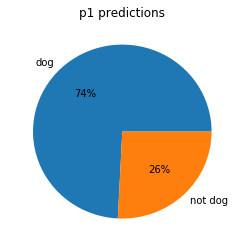

In [125]:
plt.rcParams['figure.figsize'] = [4,4]
#percentage=list(df['is_dog'].value_counts()/df.shape[0]))
plt.pie(df['is_dog'].value_counts(), 
        labels=['dog', 'not dog'],
       autopct='%.0f%%')
plt.title('p1 predictions');

**74% the images are predicted to be dog, and 26% are predicted not to be dog.**

<a id='rating_and_image'></a>

[back to top of "Data analysis and visualization"](#analysis)  [back to top of the report](#top)

### 4.2 does it affect the rating when there is not a dog in the image?

In [126]:
dog=df.query('is_dog==True')
not_dog=df.query('is_dog==False')

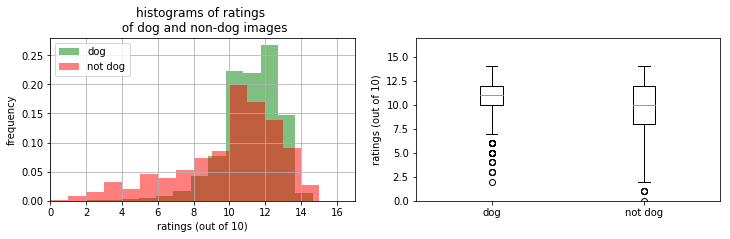

In [127]:
plt.rcParams['figure.figsize'] = [12, 3]
plt.subplot(121)
dog_ratings=dog['rating'].unique()
nondog_ratings=not_dog['rating'].unique()
dog['rating'].hist(color='green',alpha=0.5, 
                   bins=dog_ratings.max(), 
                   density=True, label='dog')
not_dog['rating'].hist(color='red',alpha=0.5, 
                   bins=nondog_ratings.max(), 
                   density=True, label='not dog')
plt.legend()
plt.title('histograms of ratings \n of dog and non-dog images')
plt.xlim(0,17)
plt.xlabel('ratings (out of 10)')
plt.ylabel('frequency')

plt.subplot(122)
plt.boxplot([dog['rating'], not_dog['rating']], labels=['dog', 'not dog'])
#plt.boxplot(nondog_ratings, color='red')
plt.ylabel('ratings (out of 10)')
plt.ylim(0,17);

Based on the above plots, it looks to me that **images that are not dog received lower ratings**.

<a id='breed_distrition'></a>

[back to top of "Data analysis and visualization"](#analysis)  [back to top of the report](#top)

### 4.3 what are the top 10 most common dog breeds?

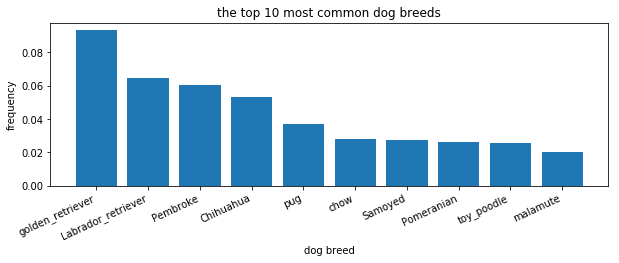

In [128]:
plt.rcParams['figure.figsize'] = [10,3]
labels=dog['image_prediction'].value_counts()[:10].index
num_dog=dog.shape[0]
heights=dog['image_prediction'].value_counts()[:10]/num_dog
plt.bar(x=labels, height=heights)
plt.xticks(rotation=25, ha='right')
plt.ylabel('frequency')
plt.xlabel('dog breed')
plt.title('the top 10 most common dog breeds');

In [129]:
dog['image_prediction'].value_counts()[:10]/num_dog*100

golden_retriever      9.308693
Labrador_retriever    6.433949
Pembroke              6.023272
Chihuahua             5.338809
pug                   3.696099
chow                  2.806297
Samoyed               2.737851
Pomeranian            2.600958
toy_poodle            2.532512
malamute              1.984942
Name: image_prediction, dtype: float64

**The top 10 most common dog breeds in the tweets are:** 
golden_retriever (9.3%), Labrador_retriever (6.4%), Pembroke (6.0%), Chihuahua (5.3%), pug (3.7%), 
chow (2.8%), Samoyed (2.7%), Pomeranian (2.6%), toy_poodle (2.5%), malamute (2.0%)

<a id='stage_distribution'></a>

[back to top of "Data analysis and visualization"](#analysis)  [back to top of the report](#top)

### 4.4 what is the distribution of dog stage like?

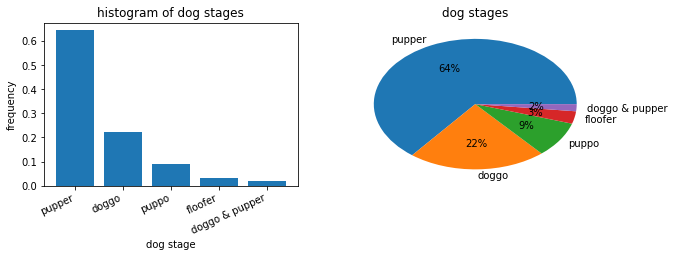

In [130]:
# plot a histogram of dog stage that is not "None"
plt.subplot(121)
plt.rcParams['figure.figsize'] = [15,3]
staged_dog=dog[dog['stage']!='None']
total_num=staged_dog.shape[0]
labels=staged_dog['stage'].value_counts().index
heights=staged_dog['stage'].value_counts()
plt.bar(x=labels, height=heights/total_num)
plt.xticks(rotation=25, ha='right')
plt.ylabel('frequency')
plt.xlabel('dog stage')
plt.title('histogram of dog stages')

plt.subplot(122)
plt.pie(heights, 
        labels=labels,
       autopct='%.0f%%')
plt.title('dog stages');

<a id='rating_and_stage'></a>

**Majority of dogs that has stage information are puppers (64%), followed by doggo (22%), and puppo (9%)**.

[back to top of "Data analysis and visualization"](#analysis)  [back to top of the report](#top)

### 4.5 how does dog stage affect rating?

In [131]:
staged_dog['stage'].value_counts()

pupper            146
doggo              50
puppo              20
floofer             7
doggo & pupper      4
Name: stage, dtype: int64

There are only 7 floofer and 4 doggo&pupper, so I will only consider pupper, doggo and puppo.

In [132]:
doggo=staged_dog.query('stage=="doggo"')['rating']
puppo=staged_dog.query('stage=="puppo"')['rating']
pupper=staged_dog.query('stage=="pupper"')['rating']

''

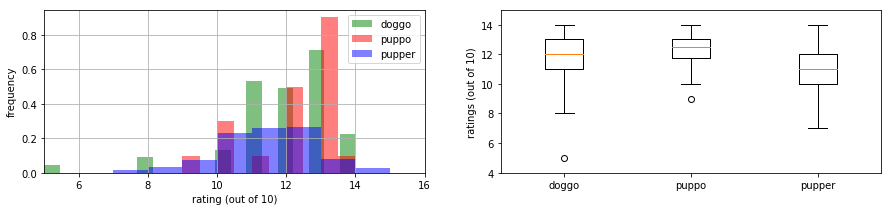

In [133]:
plt.subplot(121)
plt.rcParams['figure.figsize'] = [10,3]
doggo.hist(density=True, color='green', alpha=0.5, bins=20,  label='doggo')
puppo.hist(density=True, color='red', alpha=0.5, bins=10, label='puppo')
pupper.hist(density=True, color='blue', bins=20, alpha=0.5, label='pupper')
plt.xlim(5,16)
plt.legend()
plt.xlabel('rating (out of 10)')
plt.ylabel('frequency')


plt.subplot(122)
plt.boxplot([doggo,puppo,pupper], labels=['doggo','puppo','pupper'])
plt.ylim(4,15)
plt.ylabel('ratings (out of 10)')
;

**Dog stage don't seem to affect rating**.

<a id='media_distribution'></a>

[back to top of "Data analysis and visualization"](#analysis)  [back to top of the report](#top)

### 4.6 what's the distribution of media types?

In [134]:
df['media_types'].value_counts()

photo           1894
video             72
animated_gif       3
Name: media_types, dtype: int64

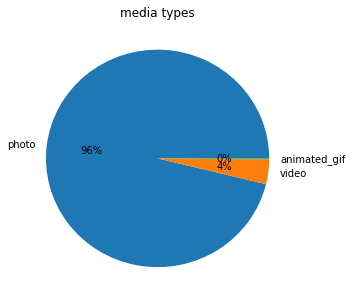

In [135]:
plt.rcParams['figure.figsize']=[5,5]
values=df['media_types'].value_counts()
labels=(df['media_types'].value_counts()).index
plt.pie(values, 
        labels=labels,
       autopct='%.0f%%')
plt.title('media types');

**96% of the media are photos, 4% are videos, and less than 1% are animated_gif**

<a id='rating_and_retweet_count'></a>

[back to top of "Data analysis and visualization"](#analysis)  [back to top of the report](#top)

### 4.7 are higher rated tweets retweeted more time?

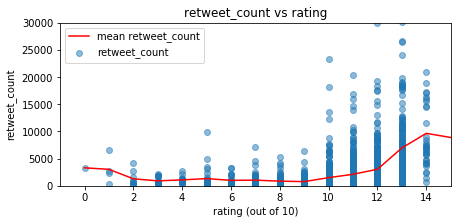

In [136]:
#plot a scater plot of retweet_count vs rating
plt.rcParams['figure.figsize']=[7,3]
plt.scatter(x=df['rating'], y=df['retweet_count'], alpha=0.5, label='retweet_count')
plt.plot(((df.groupby('rating')['retweet_count']).agg('mean')), color='red', label='mean retweet_count')
plt.xlim(-1,15)
plt.legend()
plt.ylim(0,30000)
plt.xticks()
plt.xlabel('rating (out of 10)')
plt.ylabel('retweet_count')
plt.title('retweet_count vs rating');

**higher rated tweets are retweeted more times**

<a id='rating_and_favorite_count'></a>

[back to top of "Data analysis and visualization"](#analysis)  [back to top of the report](#top)

### 4.8 are higher rated tweets more liked?

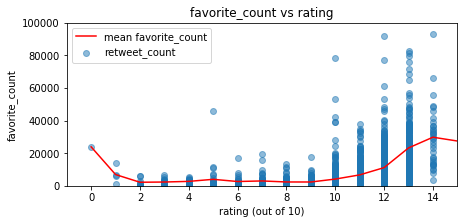

In [137]:
#plot a scater plot of retweet_count vs rating
plt.rcParams['figure.figsize']=[7,3]
plt.scatter(x=df['rating'], y=df['favorite_count'], alpha=0.5, label='retweet_count')
plt.plot(((df.groupby('rating')['favorite_count']).agg('mean')), color='red', label='mean favorite_count')
plt.xlim(-1,15)
plt.legend()
plt.ylim(0,100000)
plt.xticks()
plt.xlabel('rating (out of 10)')
plt.ylabel('favorite_count')
plt.title('favorite_count vs rating');

**higher rated tweets are more liked.**

<a id='summary_of_analysis'></a>

[back to top of "Data analysis and visualization"](#analysis)  [back to top of the report](#top)

### Summary of analysis

 - The top 10 most common dog breeds in the tweets are: golden_retriever (9.3%), Labrador_retriever (6.4%), Pembroke (6.0%), Chihuahua (5.3%), pug (3.7%), chow (2.8%), Samoyed (2.7%), Pomeranian (2.6%), toy_poodle (2.5%), malamute (2.0%)
 - images that are not dog received lower ratings.
 - 74% the images are predicted to be dog, and 26% are predicted not to be dog.
 - Majority of dogs that has stage information are puppers (64%), followed by doggo (22%), and puppo (9%).
 - Dog stage don't seem to affect rating.
 - 96% of the media are photos, 4% are videos, and less than 1% are animated_gif
 - higher rated tweets are retweeted more times
 - higher rated tweets are like more

<a id='references'></a>

[back to top of the report](#top)

## 5. References:
https://www.google.com/<br>
https://docs.python.org/3/library/<br>
https://pandas.pydata.org/pandas-docs/stable/<br>
https://stackoverflow.com<br>
https://twitter.com/dog_rates<br>
https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object.html<br>
https://pillow.readthedocs.io/en/3.1.x/reference/Image.html<br>
http://sebastianraschka.com/Articles/2014_ipython_internal_links.html<br>
https://www.sqlalchemy.org/<br>
https://matplotlib.org/tutorials/introductory/sample_plots.html